In [853]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

### Первичный анализ
Имеем 11330 объектов и 18 признаков

In [854]:
data = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/final_data.csv', delimiter=';')
print(data.shape)
data.head(3)

(11330, 18)


,Unnamed: 0,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0


In [855]:
def get_score(X, y, random_seed=42, model=None, scaler=None):
    if model is None:
        model = LinearRegression()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
    
    
    if scaler == 1:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)

In [856]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass

def get_pairplot(X, columns=None):
    if columns in None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass

Т.к. нам предстоит работать с пропусками, то для их заполнения будем использовать стандартные способы и напишем специальную функцию для этого.
- заполнение значением
- mode
- median
- mean
- метод индикатора
- линейная регрессия

In [857]:
# заполнение знаяением
def get_value(X, column, mode='mean', value=0, columns_for_reg=None):
    if mode == 'value':
        X.loc[X[X[column].isna()].index, column] = value
#заполнение медианой
    elif mode == 'median':
        X.loc[X[X[column].isna()].index, column] = X[column].median()
#заполнение модой
    elif mode == 'mode':
        X.loc[X[X[column].isna()].index, column] = X[column].mode()
# метод индикатора (принимает значение 1 при наличии пропуска и 0 в остальных случаях)
    elif mode == 'indicator':
        X['ind_' + str(column)] = 0
        X.loc[X[X[column].isna()].index, 'ind_', + str(column)] = 1
        X.loc[X[X[column].isna()].index, column] = 0
# линейная регрессия
    elif mode == 'linreg':
        if columns_for_reg is None:
            cols = list(X.select_dtypes([np.number]).columns)
            cols.remove(column)
        else:
            cols = columns_for_reg
        X_tmp = X.dropna()
        m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
        X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
        
    else:
# по умолчанию среднее значение
        X.loc[X[X[column].isna()].index, column] = X[column].mean()
    
    return X.head()

In [858]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   z_address      11330 non-null  object 
 3   bathrooms      11330 non-null  float64
 4   bedrooms       11330 non-null  float64
 5   finishedsqft   11211 non-null  float64
 6   lastsolddate   11330 non-null  object 
 7   lastsoldprice  11330 non-null  float64
 8   latitude       11315 non-null  float64
 9   longitude      11315 non-null  float64
 10  neighborhood   11330 non-null  object 
 11  totalrooms     11281 non-null  float64
 12  usecode        11290 non-null  object 
 13  yearbuilt      11330 non-null  float64
 14  zestimate      11330 non-null  float64
 15  zindexvalue    11330 non-null  object 
 16  zipcode        11330 non-null  float64
 17  zpid           11330 non-null  float64
dtypes: flo

In [859]:
data.isna().sum()

Unnamed: 0         0
address            0
z_address          0
bathrooms          0
bedrooms           0
finishedsqft     119
lastsolddate       0
lastsoldprice      0
latitude          15
longitude         15
neighborhood       0
totalrooms        49
usecode           40
yearbuilt          0
zestimate          0
zindexvalue        0
zipcode            0
zpid               0
dtype: int64

In [860]:
data.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11211.000000,1.133000e+04,11315.000000,11315.000000,11281.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1586.081349,1.263928e+06,37.759715,-122.436508,6.113997,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,922.815803,1.042079e+06,0.025583,0.030742,12.151195,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739284,-122.455149,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760514,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1878.000000,1.450000e+06,37.781386,-122.413353,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [861]:
data['Unnamed: 0'].value_counts(dropna=False)

2        1
11984    1
12018    1
12019    1
12020    1
        ..
6536     1
6538     1
6539     1
6540     1
17632    1
Name: Unnamed: 0, Length: 11330, dtype: int64

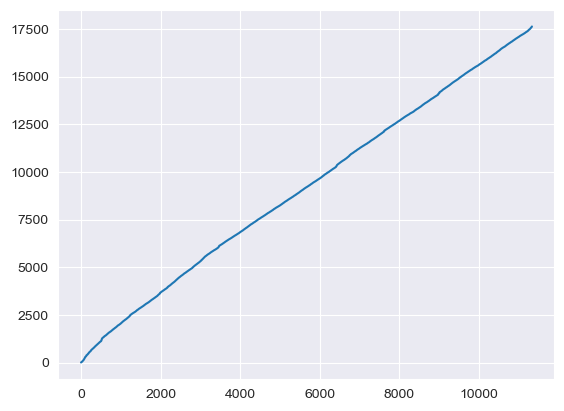

In [862]:
plt.plot(range(len(data['Unnamed: 0'])), data['Unnamed: 0'])

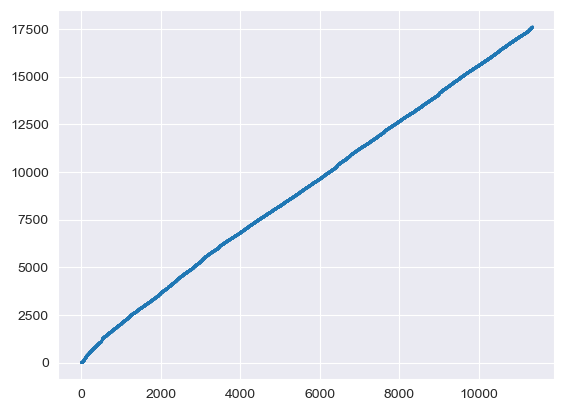

In [863]:
plt.scatter(data.index, data['Unnamed: 0'], s=0.5)

In [864]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [865]:
data.columns

Index(['address', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [866]:
cols = ['bathrooms', 'bedrooms', 'finishedsqft',
        'lastsoldprice', 'latitude', 'longitude',
        'totalrooms', 'yearbuilt']
target = ['zestimate']

get_score(data.dropna()[cols], data.dropna()[target])

0.827524961345522

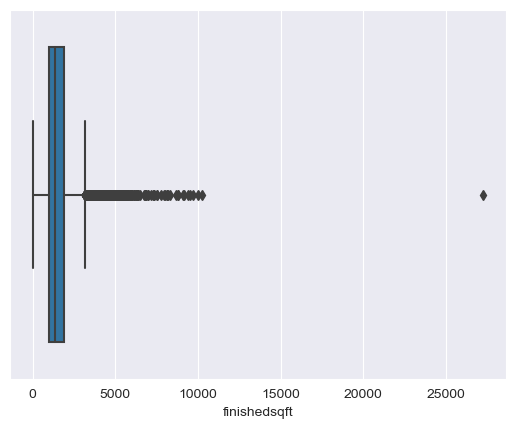

In [867]:
get_boxplot(data, columns=['finishedsqft'])

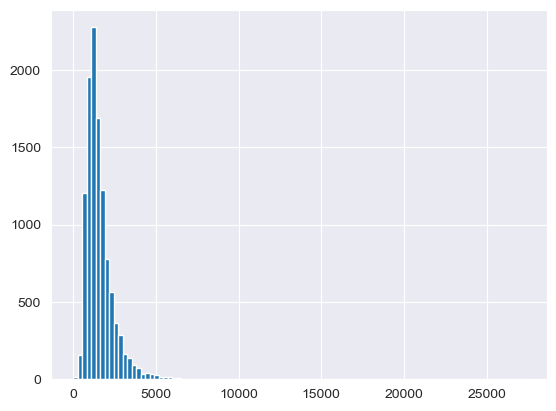

In [868]:
data['finishedsqft'].hist(bins=100)
plt.show()

In [869]:
data[data['finishedsqft'] > 15000]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
4997,Address: 1645 Pacific Avenue,1645 Pacific Ave,2.0,2.0,27275.0,03/31/2015,600000.0,37.794658,-122.422325,Nob Hill,6.0,Condominium,1906.0,6754185.0,"1,440,700",94109.0,119685483.0


In [870]:
data['finishedsqft'].isna().sum()

119

In [871]:
data['finishedsqft']

0        1043.0
1         903.0
2        1425.0
3        2231.0
4        1300.0
          ...  
11325    2100.0
11326     977.0
11327     875.0
11328     697.0
11329    1539.0
Name: finishedsqft, Length: 11330, dtype: float64

In [872]:
get_value(X=data,
          column='finishedsqft',
          mode='linreg',
          columns_for_reg=['bathrooms', 'bedrooms', 'lastsoldprice', 'latitude', 'longitude', 'yearbuilt'])

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [873]:
data.isna().sum()

address           0
z_address         0
bathrooms         0
bedrooms          0
finishedsqft      0
lastsolddate      0
lastsoldprice     0
latitude         15
longitude        15
neighborhood      0
totalrooms       49
usecode          40
yearbuilt         0
zestimate         0
zindexvalue       0
zipcode           0
zpid              0
dtype: int64

Посмотрим на широтy и долготу. Видим, что во всех выбросах широты и долготы, пропущены сразу оба значения. Нет объектов, где пропущено что-то одно (берем индексы NaN'ов из широты, делаем из них множество и вычетаем множество индексов NaN'ов долготы, получаем пустое множество).

In [874]:
set(data[data['latitude'].isna()].index) - set(data[data['longitude'].isna()].index)

set()

In [875]:
data[data['latitude'].isna()]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
830,Address: 1566 27th Avenue,1566 27th Ave,3.5,3.0,2050.0,10/22/2015,1320000.0,NaN,NaN,Central Sunset,6.0,SingleFamily,1931.0,1371619.0,"1,125,700",94122.0,15107055.0
2120,Address: 2033 Judah Street,2033-2035 Judah St,4.0,4.0,2500.0,05/22/2015,1480000.0,NaN,NaN,Central Sunset,12.0,MultiFamily2To4,1948.0,1533582.0,"1,111,300",94122.0,15105245.0
2360,Address: 465 Myra Way,465 Myra Way,2.5,3.0,1800.0,04/24/2015,1260000.0,NaN,NaN,Miraloma Park,6.0,SingleFamily,1962.0,1290743.0,"1,227,600",94127.0,15136598.0
5150,Address: 2342 Octavia Street,2342 Octavia St,3.5,4.0,2857.0,05/21/2014,3700000.0,NaN,NaN,Pacific Heights,7.0,SingleFamily,1939.0,4814430.0,"1,884,400",94109.0,15073523.0
5835,Address: 3189 Cesar Chavez #2,3189 Cesar Chavez # 2,2.0,3.0,1807.0,03/25/2014,775000.0,NaN,NaN,Bernal Heights,6.0,Condominium,1981.0,2045775.0,"1,214,400",94110.0,15159689.0
7987,Address: 331 Capistrano Avenue,331 Capistrano Ave,2.0,4.0,1668.0,08/09/2013,803000.0,NaN,NaN,Mission Terrace,9.0,SingleFamily,1925.0,1180548.0,"986,000",94112.0,15139972.0
8307,Address: 5853 Mission Street #4,5853 Mission St APT 4,1.0,2.0,780.0,01/30/2015,350000.0,NaN,NaN,Crocker Amazon,5.0,Condominium,1980.0,558681.0,"817,600",94112.0,15178879.0
8651,Address: 3438 Taraval Street,3438 Taraval St,2.0,1.0,1062.0,04/23/2013,650000.0,NaN,NaN,Outer Parkside,5.0,SingleFamily,1941.0,887624.0,"982,900",94116.0,15121276.0
9108,Address: 1 South Park Street #305,1 S Park St APT 305,2.0,2.0,1374.0,02/28/2013,1500000.0,NaN,NaN,South Beach,5.0,Condominium,2007.0,1859234.0,"1,269,100",94107.0,89238489.0
9517,Address: 1021 Divisadero Street,1021-1023 Divisadero St,2.0,7.0,2950.0,12/28/2012,392500.0,NaN,NaN,North Panhandle,11.0,MultiFamily2To4,1900.0,2270942.0,"1,211,900",94115.0,15084997.0


In [876]:
set(data[data['latitude'].isna()]['z_address']) & set(data[~data['latitude'].isna()]['z_address'])

{'1015 Ashbury St APT 2', '1566 27th Ave', '5853 Mission St APT 4'}

In [877]:
data[data['z_address'] == '1015 Ashbury St APT 2']

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
61,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1252.000000,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,4.0,Condominium,1913.0,1300995.0,"2,151,400",94117.0,79843553.0
8551,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1252.000000,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,4.0,Condominium,1913.0,1319182.0,"2,111,800",94117.0,79843553.0
9375,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1571.764935,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,4.0,Condominium,1913.0,1319182.0,"2,111,800",94117.0,79843553.0
11314,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1252.000000,02/05/2016,1350000.0,NaN,NaN,Parnassus - Ashbury,NaN,Condominium,1913.0,1320620.0,"2,111,800",94117.0,79843553.0


In [878]:
for i, el in data[data['latitude'].isna()].iterrows():
    cur_el = data[data['z_address'] == el['z_address']]
    if cur_el.shape[0] > 0:
        data.loc[i, 'latitude'] = cur_el.iloc[0]['latitude']
        data.loc[i, 'longitude'] = cur_el.iloc[0]['longitude']

In [879]:
data[data['z_address'] == '1015 Ashbury St APT 2']

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
61,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1252.000000,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,4.0,Condominium,1913.0,1300995.0,"2,151,400",94117.0,79843553.0
8551,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1252.000000,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,4.0,Condominium,1913.0,1319182.0,"2,111,800",94117.0,79843553.0
9375,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1571.764935,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,4.0,Condominium,1913.0,1319182.0,"2,111,800",94117.0,79843553.0
11314,Address: 1015 Ashbury Street #2,1015 Ashbury St APT 2,2.0,2.0,1252.000000,02/05/2016,1350000.0,37.76432,-122.446342,Parnassus - Ashbury,NaN,Condominium,1913.0,1320620.0,"2,111,800",94117.0,79843553.0


In [880]:
#data.drop(columns=['zindexvalue', 'zpid'], inplace=True)

In [881]:
data[data['latitude'].isna()]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
830,Address: 1566 27th Avenue,1566 27th Ave,3.5,3.0,2050.0,10/22/2015,1320000.0,NaN,NaN,Central Sunset,6.0,SingleFamily,1931.0,1371619.0,"1,125,700",94122.0,15107055.0
2120,Address: 2033 Judah Street,2033-2035 Judah St,4.0,4.0,2500.0,05/22/2015,1480000.0,NaN,NaN,Central Sunset,12.0,MultiFamily2To4,1948.0,1533582.0,"1,111,300",94122.0,15105245.0
2360,Address: 465 Myra Way,465 Myra Way,2.5,3.0,1800.0,04/24/2015,1260000.0,NaN,NaN,Miraloma Park,6.0,SingleFamily,1962.0,1290743.0,"1,227,600",94127.0,15136598.0
5150,Address: 2342 Octavia Street,2342 Octavia St,3.5,4.0,2857.0,05/21/2014,3700000.0,NaN,NaN,Pacific Heights,7.0,SingleFamily,1939.0,4814430.0,"1,884,400",94109.0,15073523.0
5835,Address: 3189 Cesar Chavez #2,3189 Cesar Chavez # 2,2.0,3.0,1807.0,03/25/2014,775000.0,NaN,NaN,Bernal Heights,6.0,Condominium,1981.0,2045775.0,"1,214,400",94110.0,15159689.0
7987,Address: 331 Capistrano Avenue,331 Capistrano Ave,2.0,4.0,1668.0,08/09/2013,803000.0,NaN,NaN,Mission Terrace,9.0,SingleFamily,1925.0,1180548.0,"986,000",94112.0,15139972.0
8651,Address: 3438 Taraval Street,3438 Taraval St,2.0,1.0,1062.0,04/23/2013,650000.0,NaN,NaN,Outer Parkside,5.0,SingleFamily,1941.0,887624.0,"982,900",94116.0,15121276.0
9108,Address: 1 South Park Street #305,1 S Park St APT 305,2.0,2.0,1374.0,02/28/2013,1500000.0,NaN,NaN,South Beach,5.0,Condominium,2007.0,1859234.0,"1,269,100",94107.0,89238489.0
9517,Address: 1021 Divisadero Street,1021-1023 Divisadero St,2.0,7.0,2950.0,12/28/2012,392500.0,NaN,NaN,North Panhandle,11.0,MultiFamily2To4,1900.0,2270942.0,"1,211,900",94115.0,15084997.0
9879,Address: 970 Wisconsin Street #1,970 Wisconsin St # 1,2.0,3.0,825.0,11/21/2012,649000.0,NaN,NaN,Potrero Hill,5.0,Condominium,1992.0,890937.0,"1,264,000",94107.0,82786414.0


Для других объектов заполним пропущенные значения медианой по принадлежности району. Для этого получим уникальные сочетания почтовых индексов и районов, и выведем для этих сочетаний медианные значения широты и долготы.

In [882]:
data_long_lat = data.groupby(['zipcode', 'neighborhood']).agg(
    {'latitude': 'median',
     'longitude': 'median'}
).reset_index()

In [883]:
data.shape

(11330, 17)

In [884]:
data_long_lat

,zipcode,neighborhood,latitude,longitude
0,94102.0,Downtown,37.786190,-122.407630
1,94102.0,Hayes Valley,37.772243,-122.426551
2,94102.0,Van Ness - Civic Center,37.781386,-122.421406
3,94103.0,Mission,37.766736,-122.421846
4,94103.0,South of Market,37.775993,-122.411809
...,...,...,...,...
124,94134.0,Excelsior,37.728280,-122.423571
125,94134.0,Little Hollywood,37.712230,-122.398930
126,94134.0,Portola,37.726208,-122.411113
127,94134.0,Visitacion Valley,37.714392,-122.405860


In [885]:
for i, el in data[data['latitude'].isna()].iterrows():
    data.loc[i, 'latitude'] = data_long_lat[
        (data_long_lat['zipcode'] == el['zipcode'])
        & (data_long_lat['neighborhood'] == el['neighborhood'])
        ]['latitude'].values[0]

    data.loc[i, 'longitude'] = data_long_lat[
        (data_long_lat['zipcode'] == el['zipcode'])
        & (data_long_lat['neighborhood'] == el['neighborhood'])
        ]['longitude'].values[0]

In [886]:
data.isna().sum()

address           0
z_address         0
bathrooms         0
bedrooms          0
finishedsqft      0
lastsolddate      0
lastsoldprice     0
latitude          0
longitude         0
neighborhood      0
totalrooms       49
usecode          40
yearbuilt         0
zestimate         0
zindexvalue       0
zipcode           0
zpid              0
dtype: int64

In [887]:
get_score(data.dropna()[cols], data.dropna()[target])

0.8414860944265522

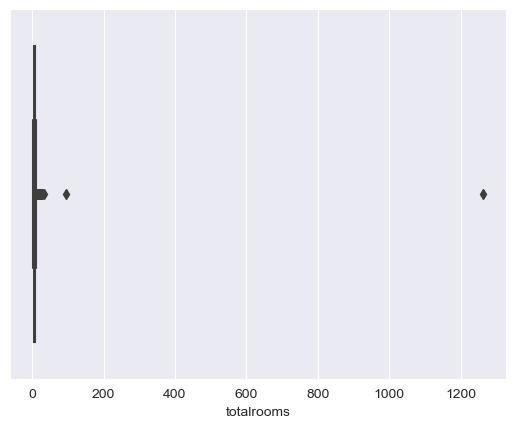

In [888]:
get_boxplot(data, ['totalrooms'])

In [889]:
data[data['totalrooms'] > 75]

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
8300,Address: 5264 3rd Street #304,5264 3rd St APT 304,2.0,2.0,805.0,07/18/2013,325000.0,37.729825,-122.392825,Bayview,94.0,Condominium,1993.0,502285.0,"719,000",94124.0,15158931.0
8967,Address: 2829 California Street #3C,2829 California St APT 3C,2.0,2.0,1264.0,03/14/2013,1375000.0,37.787654,-122.440902,Lower Pacific Heights,1264.0,Condominium,2012.0,1591608.0,"1,146,900",94115.0,119684820.0


In [890]:
#data = data[(data['totalrooms'] < 75) | (data['totalrooms'].isna())]

In [891]:
#data.shape

In [892]:
# заполняем пропущенные значения с помощью метода линейной регрессии 
get_value(X=data,
          column='totalrooms',
          mode='linreg',
          columns_for_reg=['bathrooms', 'bedrooms', 'lastsoldprice', 'latitude', 'longitude', 'yearbuilt', 'finishedsqft'])

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [893]:
data['usecode'].value_counts(dropna=False)

SingleFamily        5785
Condominium         4782
MultiFamily2To4      484
Duplex               146
Townhouse             66
NaN                   40
Miscellaneous         17
Apartment              3
Cooperative            3
Mobile                 2
MultiFamily5Plus       2
Name: usecode, dtype: int64

Разметим наши данные колонки 'usecode' с помощью LabelEncoder, а затем обучим логистическую регрессию на них и получим предсказанные значения.

In [894]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [895]:
X_tmp = data.dropna()
X_tmp.head(3)

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0


In [896]:
X_tmp.isna().sum()

address          0
z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

In [897]:
le = LabelEncoder()
X_tmp['usecode_target'] = le.fit_transform(X_tmp['usecode'])

In [898]:
logreg = LogisticRegression()
cols = ['bathrooms', 'bedrooms', 'finishedsqft',
        'lastsoldprice', 'latitude', 'longitude',
        'totalrooms', 'yearbuilt']
logreg.fit(X_tmp[cols], X_tmp['usecode_target'])

LogisticRegression()

Делаем обратное преобразование LabelEncoder и получаем предсказанные данные.

In [899]:
preds = logreg.predict(data[data['usecode'].isna()][cols])
preds

array([8, 8, 1, 1, 1, 8, 8, 1, 8, 8, 8, 8, 8, 1, 1, 1, 8, 8, 8, 8, 8, 1,
       8, 8, 1, 8, 8, 8, 1, 1, 8, 8, 1, 1, 1, 1, 8, 8, 8, 8])

In [900]:
preds_cat = le.inverse_transform(preds)
preds_cat

array(['SingleFamily', 'SingleFamily', 'Condominium', 'Condominium',
       'Condominium', 'SingleFamily', 'SingleFamily', 'Condominium',
       'SingleFamily', 'SingleFamily', 'SingleFamily', 'SingleFamily',
       'SingleFamily', 'Condominium', 'Condominium', 'Condominium',
       'SingleFamily', 'SingleFamily', 'SingleFamily', 'SingleFamily',
       'SingleFamily', 'Condominium', 'SingleFamily', 'SingleFamily',
       'Condominium', 'SingleFamily', 'SingleFamily', 'SingleFamily',
       'Condominium', 'Condominium', 'SingleFamily', 'SingleFamily',
       'Condominium', 'Condominium', 'Condominium', 'Condominium',
       'SingleFamily', 'SingleFamily', 'SingleFamily', 'SingleFamily'],
      dtype=object)

In [901]:
data.loc[data[data['usecode'].isna()].index, 'usecode'] = preds_cat

В итоге, все пропуски во всех признаках заполнены, задача выполнена.

In [902]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   z_address      11330 non-null  object 
 2   bathrooms      11330 non-null  float64
 3   bedrooms       11330 non-null  float64
 4   finishedsqft   11330 non-null  float64
 5   lastsolddate   11330 non-null  object 
 6   lastsoldprice  11330 non-null  float64
 7   latitude       11330 non-null  float64
 8   longitude      11330 non-null  float64
 9   neighborhood   11330 non-null  object 
 10  totalrooms     11330 non-null  float64
 11  usecode        11330 non-null  object 
 12  yearbuilt      11330 non-null  float64
 13  zestimate      11330 non-null  float64
 14  zindexvalue    11330 non-null  object 
 15  zipcode        11330 non-null  float64
 16  zpid           11330 non-null  float64
dtypes: float64(11), object(6)
memory usage: 1.5+ MB


In [903]:
data_copy = data
data = pd.get_dummies(data, columns=['usecode'])
data.head()

,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,...,usecode_Apartment,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse
0,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,...,0,1,0,0,0,0,0,0,0,0
1,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,...,0,1,0,0,0,0,0,0,0,0
2,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,...,0,1,0,0,0,0,0,0,0,0
3,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,...,0,0,0,0,0,0,0,0,1,0
4,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,...,0,0,0,0,0,0,0,0,1,0


In [904]:
cols_to_drop = ['address', 'z_address', 'lastsolddate', 'neighborhood', 'zestimate', 'zipcode']
get_score(data.dropna()[cols], data.dropna()[target])

0.8488043443295813

In [905]:
data[cols]

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt
0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,4.0,2007.0
1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,3.0,2004.0
2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,6.0,2003.0
3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,10.0,1927.0
4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,4.0,1900.0
...,...,...,...,...,...,...,...,...
11325,2.0,3.0,2100.0,1950000.0,37.739623,-122.428899,10.0,1900.0
11326,2.0,2.0,977.0,1030000.0,37.775184,-122.411567,5.0,2006.0
11327,1.0,2.0,875.0,565000.0,37.709411,-122.465031,4.0,1950.0
11328,1.0,2.0,697.0,762000.0,37.755586,-122.508063,4.0,1904.0


In [906]:
cols_to_drop = ['address', 'z_address', 'lastsolddate', 'neighborhood', 'zestimate', 'zipcode']
get_score(data[cols], data[target])

0.8488043443295813

<h2>Summary</h2>
<ol><li>Первичный <b>визуальный анализ</b> данных очень <b>важен</b> для выявления <b>выбросов/шума</b>, корреляций между признаками, что может значительно <b>ухудшить</b> эффективность модели.</li><li><b>Не стоит</b> сразу <b>удалять</b> столбец или строку, если в ней п<b>ропущенное значение</b>, это может повлечь потерю информации. В зависимости от ситуации, пропуск можно <b>заменить</b> медианой, средним, модой или индикатором.</li></ol>

In [907]:
df = pd.DataFrame(data_copy)

In [908]:
needed_column = ['address', 'z_address', 'bathrooms',
                 'bedrooms', 'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
                 'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
                 'zestimate', 'zindexvalue', 'zipcode', 'zpid']

In [909]:
df = df[needed_column]

In [910]:
df.columns

Index(['address', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [911]:
df.shape

(11330, 17)

In [912]:
df.isna().sum()

address          0
z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

In [913]:
for_drop = [ 'address', 'zindexvalue', 'zpid']
data_processed = df.drop(columns=for_drop)

In [914]:
#!pip install category_encoders

In [915]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.count import CountEncoder


def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each)
        X = pd.concat([X, dummies], axis=1)
    return X

def get_label(X, cols):
    X = X.copy()
    for each in cols:
        le = LabelEncoder()
        labels = le.fit_transform(X[each])
        X[each] = labels
    return X

def get_count(X, cols):
    X = X.copy()

    for col in cols:
        X[col] = X[col].astype('str')

    ce = CountEncoder(handle_unknown=-1)
    ce.fit(X[cols])
    X[cols] = ce.transform(X[cols])
    return X

In [916]:
data_processed.head()

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,94103.0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,94107.0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,94107.0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,94107.0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,94110.0


In [917]:
columns = [
    'bathrooms',
    'bedrooms',
    'finishedsqft',
    'latitude',
    'longitude',
    'totalrooms'
]

In [918]:
get_score(data_processed[columns], data_processed['zestimate'], scaler=1)

0.6458256684062822

## Обработка категорий

In [919]:
exclude_columns = ['z_address', 'lastsoldprice', 'zestimate', 'lastsolddate', 'neighborhood', 'usecode']

### usecode

In [920]:
data_processed['usecode'].value_counts()

SingleFamily        5810
Condominium         4797
MultiFamily2To4      484
Duplex               146
Townhouse             66
Miscellaneous         17
Apartment              3
Cooperative            3
Mobile                 2
MultiFamily5Plus       2
Name: usecode, dtype: int64

In [921]:
tmp = get_one_hot(data_processed, cols=['usecode'])
tmp.head()

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,...,usecode_Apartment,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,...,0,1,0,0,0,0,0,0,0,0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,...,0,1,0,0,0,0,0,0,0,0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,...,0,1,0,0,0,0,0,0,0,0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,...,0,0,0,0,0,0,0,0,1,0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,...,0,0,0,0,0,0,0,0,1,0


In [922]:
get_score(tmp.drop(columns=exclude_columns), data_processed['zestimate'])

0.6741878231748215

In [923]:
tmp = get_count(data_processed, cols=['usecode'])
tmp.head()

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zipcode
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,4797,2007.0,1167508.0,94103.0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,4797,2004.0,823719.0,94107.0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,4797,2003.0,1708594.0,94107.0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,5810,1927.0,2411236.0,94107.0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,5810,1900.0,1918539.0,94110.0


In [924]:
get_score(tmp.drop(columns=exclude_columns), data_processed['zestimate'])

0.654779620247399

In [925]:
data_processed = get_one_hot(data_processed, cols=['usecode'])

### neighborhood

In [926]:
tmp = get_one_hot(data_processed, cols=['neighborhood'])
tmp.head()

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,...,neighborhood_Sunnyside,neighborhood_Telegraph Hill,neighborhood_Twin Peaks,neighborhood_Van Ness - Civic Center,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Highlands,neighborhood_Westwood Park,neighborhood_Yerba Buena
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,...,0,0,0,0,0,0,0,0,0,0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,...,0,0,0,0,0,0,0,0,0,0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,...,0,0,0,0,0,0,0,0,0,0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,...,0,0,0,0,0,0,0,0,0,0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,...,0,0,0,0,0,0,0,0,0,0


In [927]:
get_score(tmp.drop(columns=exclude_columns), data_processed['zestimate'], scaler=1)

0.7489055238838742

In [928]:
data_processed['neighborhood'].value_counts()

Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

In [929]:
tmp = get_count(data_processed, cols=['neighborhood'])
tmp.head()

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,...,usecode_Apartment,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,524,4.0,...,0,1,0,0,0,0,0,0,0,0
1,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,524,3.0,...,0,1,0,0,0,0,0,0,0,0
2,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,312,6.0,...,0,1,0,0,0,0,0,0,0,0
3,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,312,10.0,...,0,0,0,0,0,0,0,0,1,0
4,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,525,4.0,...,0,0,0,0,0,0,0,0,1,0


In [930]:
get_score(tmp.drop(columns=exclude_columns), data_processed['zestimate'], scaler=1)

0.6739120714377748

In [931]:
data_processed = get_one_hot(data_processed, cols=['neighborhood'])

### lastsolddate

In [932]:
data_processed['lastsolddate'].head()

0    02/17/2016
1    02/17/2016
2    02/17/2016
3    02/17/2016
4    02/17/2016
Name: lastsolddate, dtype: object

In [933]:
data_processed['lastsolddate'] = pd.to_datetime(data_processed['lastsolddate'])

In [934]:
data_processed['lastsolddate'].head()

0   2016-02-17
1   2016-02-17
2   2016-02-17
3   2016-02-17
4   2016-02-17
Name: lastsolddate, dtype: datetime64[ns]

In [935]:
data_processed['lastsoldmonth'] = data_processed['lastsolddate'].dt.month
data_processed['lastsoldmonth']

0        2
1        2
2        2
3        2
4        2
        ..
11325    2
11326    2
11327    2
11328    2
11329    2
Name: lastsoldmonth, Length: 11330, dtype: int64

In [936]:
data_processed['lastsolddate'] = [t.timestamp() for t in data_processed['lastsolddate']]
data_processed['lastsolddate']

0        1.455667e+09
1        1.455667e+09
2        1.455667e+09
3        1.455667e+09
4        1.455667e+09
             ...     
11325    1.454458e+09
11326    1.454371e+09
11327    1.454371e+09
11328    1.454371e+09
11329    1.454285e+09
Name: lastsolddate, Length: 11330, dtype: float64

In [937]:
# exclude_columns = ['z_address', 'lastsoldprice', 'zestimate', 'lastsolddate', 'neighborhood', 'usecode']
exclude_columns = ['z_address', 'lastsoldprice', 'zestimate', 'neighborhood', 'usecode']

In [938]:
get_score(data_processed.drop(columns=exclude_columns), data_processed['zestimate'], scaler=1)

0.7487410298669981

In [939]:
tmp = get_one_hot(data_processed, cols=['lastsoldmonth']).drop(columns=exclude_columns)
tmp.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,latitude,longitude,totalrooms,yearbuilt,zipcode,usecode_Apartment,...,lastsoldmonth_3,lastsoldmonth_4,lastsoldmonth_5,lastsoldmonth_6,lastsoldmonth_7,lastsoldmonth_8,lastsoldmonth_9,lastsoldmonth_10,lastsoldmonth_11,lastsoldmonth_12
0,2.0,2.0,1043.0,1.455667e+09,37.778705,-122.412635,4.0,2007.0,94103.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,1.455667e+09,37.777641,-122.393417,3.0,2004.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,1.455667e+09,37.759198,-122.396516,6.0,2003.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,1.455667e+09,37.761886,-122.396769,10.0,1927.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,3.0,1300.0,1.455667e+09,37.740795,-122.413453,4.0,1900.0,94110.0,0,...,0,0,0,0,0,0,0,0,0,0


In [940]:
get_score(tmp, data_processed['zestimate'], scaler=1)

0.7481965849661256

In [941]:
tmp = get_one_hot(data_processed[['lastsoldmonth']], cols=['lastsoldmonth'])
tmp.head()

,lastsoldmonth,lastsoldmonth_1,lastsoldmonth_2,lastsoldmonth_3,lastsoldmonth_4,lastsoldmonth_5,lastsoldmonth_6,lastsoldmonth_7,lastsoldmonth_8,lastsoldmonth_9,lastsoldmonth_10,lastsoldmonth_11,lastsoldmonth_12
0,2,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,0,0,0,0,0,0


In [942]:
get_score(tmp, data_processed['zestimate'], scaler=1)

0.0029426533735954497

In [943]:
data_processed['lastsoldmonth'].value_counts()

10    1433
8     1165
11    1088
7     1075
12     988
9      983
4      872
3      863
2      817
1      759
5      682
6      605
Name: lastsoldmonth, dtype: int64

In [944]:
tmp = get_count(data_processed, cols=['lastsoldmonth']).drop(columns=exclude_columns)
tmp.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,latitude,longitude,totalrooms,yearbuilt,zipcode,usecode_Apartment,...,neighborhood_Telegraph Hill,neighborhood_Twin Peaks,neighborhood_Van Ness - Civic Center,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Highlands,neighborhood_Westwood Park,neighborhood_Yerba Buena,lastsoldmonth
0,2.0,2.0,1043.0,1.455667e+09,37.778705,-122.412635,4.0,2007.0,94103.0,0,...,0,0,0,0,0,0,0,0,0,817
1,1.0,1.0,903.0,1.455667e+09,37.777641,-122.393417,3.0,2004.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,817
2,4.0,3.0,1425.0,1.455667e+09,37.759198,-122.396516,6.0,2003.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,817
3,3.0,3.0,2231.0,1.455667e+09,37.761886,-122.396769,10.0,1927.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,817
4,3.0,3.0,1300.0,1.455667e+09,37.740795,-122.413453,4.0,1900.0,94110.0,0,...,0,0,0,0,0,0,0,0,0,817


In [945]:
get_score(tmp, data_processed['zestimate'], scaler=1)

0.7488999687236425

In [946]:
get_score(tmp, data_processed['zestimate'])

0.7492087005092003

In [947]:
data_processed = get_count(data_processed, cols=['lastsoldmonth'])

### zipcode

In [948]:
tmp = get_one_hot(data_processed, cols=['zipcode']).drop(columns=exclude_columns)
tmp.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,latitude,longitude,totalrooms,yearbuilt,zipcode,usecode_Apartment,...,zipcode_94121.0,zipcode_94122.0,zipcode_94123.0,zipcode_94124.0,zipcode_94127.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0
0,2.0,2.0,1043.0,1.455667e+09,37.778705,-122.412635,4.0,2007.0,94103.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,1.455667e+09,37.777641,-122.393417,3.0,2004.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,1.455667e+09,37.759198,-122.396516,6.0,2003.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,1.455667e+09,37.761886,-122.396769,10.0,1927.0,94107.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,3.0,1300.0,1.455667e+09,37.740795,-122.413453,4.0,1900.0,94110.0,0,...,0,0,0,0,0,0,0,0,0,0


In [949]:
get_score(tmp, data_processed['zestimate'], scaler=1)

0.7550534902272416

In [950]:
tmp = get_label(data_processed, cols=['zipcode']).drop(columns=exclude_columns)
tmp.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,latitude,longitude,totalrooms,yearbuilt,zipcode,usecode_Apartment,...,neighborhood_Telegraph Hill,neighborhood_Twin Peaks,neighborhood_Van Ness - Civic Center,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Highlands,neighborhood_Westwood Park,neighborhood_Yerba Buena,lastsoldmonth
0,2.0,2.0,1043.0,1.455667e+09,37.778705,-122.412635,4.0,2007.0,1,0,...,0,0,0,0,0,0,0,0,0,817
1,1.0,1.0,903.0,1.455667e+09,37.777641,-122.393417,3.0,2004.0,4,0,...,0,0,0,0,0,0,0,0,0,817
2,4.0,3.0,1425.0,1.455667e+09,37.759198,-122.396516,6.0,2003.0,4,0,...,0,0,0,0,0,0,0,0,0,817
3,3.0,3.0,2231.0,1.455667e+09,37.761886,-122.396769,10.0,1927.0,4,0,...,0,0,0,0,0,0,0,0,0,817
4,3.0,3.0,1300.0,1.455667e+09,37.740795,-122.413453,4.0,1900.0,7,0,...,0,0,0,0,0,0,0,0,0,817


In [951]:
get_score(tmp, data_processed['zestimate'], scaler=None)

0.7495700827586029

In [952]:
tmp = get_count(data_processed, cols=['zipcode']).drop(columns=exclude_columns)
tmp.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,latitude,longitude,totalrooms,yearbuilt,zipcode,usecode_Apartment,...,neighborhood_Telegraph Hill,neighborhood_Twin Peaks,neighborhood_Van Ness - Civic Center,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Highlands,neighborhood_Westwood Park,neighborhood_Yerba Buena,lastsoldmonth
0,2.0,2.0,1043.0,1.455667e+09,37.778705,-122.412635,4.0,2007.0,360,0,...,0,0,0,0,0,0,0,0,0,817
1,1.0,1.0,903.0,1.455667e+09,37.777641,-122.393417,3.0,2004.0,857,0,...,0,0,0,0,0,0,0,0,0,817
2,4.0,3.0,1425.0,1.455667e+09,37.759198,-122.396516,6.0,2003.0,857,0,...,0,0,0,0,0,0,0,0,0,817
3,3.0,3.0,2231.0,1.455667e+09,37.761886,-122.396769,10.0,1927.0,857,0,...,0,0,0,0,0,0,0,0,0,817
4,3.0,3.0,1300.0,1.455667e+09,37.740795,-122.413453,4.0,1900.0,935,0,...,0,0,0,0,0,0,0,0,0,817


In [953]:
get_score(tmp, data_processed['zestimate'], scaler=1)

0.7475491056760324

In [954]:
data_processed = get_one_hot(data_processed, cols=['zipcode'])

In [955]:
data_processed.shape

(11330, 121)

### z_address

<img src='https://drive.google.com/uc?export=view&id=14nvoZ71VqMfYBY6ff_7_Btx-tVwL_4lB'>

TF (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа. Таким образом, оценивается важность слова t в пределах отдельного документа.

$$tf = \frac {n_t}{\sum _{k}n_{k}}$$

*TF термина а = (Количество раз, когда термин а встретился в тексте / количество всех слов в тексте)*



IDF (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции.

$$idf=\log \frac {|D|}{|\{\,d_{i}\in D\mid t\in d_{i}\,\}|}$$

*IDF термина а = логарифм(Общее количество документов / Количество документов, в которых встречается термин а)*



Таким образом, мера TF-IDF является произведением двух сомножителей:

Большой вес в TF-IDF получат слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах. 

In [956]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50, stop_words='english')
vectorized = tfidf.fit_transform(data_processed['z_address'])

vectorized

<11330x50 sparse matrix of type '<class 'numpy.float64'>'
	with 17826 stored elements in Compressed Sparse Row format>

In [957]:
vectorized_df = pd.DataFrame(vectorized.toarray(), columns=tfidf.get_feature_names())
vectorized_df

,101,15th,17th,18th,19th,1st,201,20th,22nd,23rd,...,ness,pacific,sacramento,san,st,sutter,ter,unit,van,way
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.207690,0.0,0.0,0.498299,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.167233,0.0,0.0,0.401232,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.247710,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
11326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
11327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
11328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [958]:
tmp = pd.concat([data_processed, vectorized_df], axis=1).drop(columns=exclude_columns)
tmp.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,latitude,longitude,totalrooms,yearbuilt,zipcode,usecode_Apartment,...,ness,pacific,sacramento,san,st,sutter,ter,unit,van,way
0,2.0,2.0,1043.0,1.455667e+09,37.778705,-122.412635,4.0,2007.0,94103.0,0,...,0.0,0.0,0.0,0.0,0.207690,0.0,0.0,0.498299,0.0,0.0
1,1.0,1.0,903.0,1.455667e+09,37.777641,-122.393417,3.0,2004.0,94107.0,0,...,0.0,0.0,0.0,0.0,0.167233,0.0,0.0,0.401232,0.0,0.0
2,4.0,3.0,1425.0,1.455667e+09,37.759198,-122.396516,6.0,2003.0,94107.0,0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
3,3.0,3.0,2231.0,1.455667e+09,37.761886,-122.396769,10.0,1927.0,94107.0,0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0
4,3.0,3.0,1300.0,1.455667e+09,37.740795,-122.413453,4.0,1900.0,94110.0,0,...,0.0,0.0,0.0,0.0,0.247710,0.0,0.0,0.000000,0.0,0.0


In [959]:
get_score(tmp, data_processed['zestimate'], scaler=1)

0.7566491128666735

In [960]:
data_processed = pd.concat([data_processed, vectorized_df], axis=1)

In [962]:
data_processed.shape

(11330, 171)

## Работа с геоданными

In [963]:
from sklearn.cluster import DBSCAN, KMeans

In [964]:
len(data_processed['zipcode'].unique())

25

In [965]:
# kmeans = KMeans(n_clusters=25)
kmeans = KMeans(n_clusters=15)

cluster = kmeans.fit_predict(data_processed[['latitude', 'longitude']])

In [966]:
tmp = data_processed.copy()
tmp['cluster'] = cluster
tmp.head()

,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,...,pacific,sacramento,san,st,sutter,ter,unit,van,way,cluster
0,1160 Mission St UNIT 2007,2.0,2.0,1043.0,1.455667e+09,1300000.0,37.778705,-122.412635,South of Market,4.0,...,0.0,0.0,0.0,0.207690,0.0,0.0,0.498299,0.0,0.0,11
1,260 King St UNIT 475,1.0,1.0,903.0,1.455667e+09,750000.0,37.777641,-122.393417,South of Market,3.0,...,0.0,0.0,0.0,0.167233,0.0,0.0,0.401232,0.0,0.0,3
2,560 Missouri St # B,4.0,3.0,1425.0,1.455667e+09,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,12
3,350 Missouri St,3.0,3.0,2231.0,1.455667e+09,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,12
4,3658 Folsom St,3.0,3.0,1300.0,1.455667e+09,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,...,0.0,0.0,0.0,0.247710,0.0,0.0,0.000000,0.0,0.0,1


In [967]:
get_score(tmp.drop(columns=exclude_columns), data_processed['zestimate'])

0.7564830454375281

In [968]:
data_processed = tmp.copy()

In [969]:
#!pip install reverse_geocoder


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [970]:
import reverse_geocoder as revgc

revgc.search((data_processed.iloc[10].latitude, data_processed.iloc[10].longitude))   

Loading formatted geocoded file...


[{'lat': '37.68077',
  'lon': '-122.39997',
  'name': 'Brisbane',
  'admin1': 'California',
  'admin2': 'San Mateo County',
  'cc': 'US'}]

In [971]:
#!pip install folium


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [973]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point, color):

    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        weight=5,
        color=color,
        popup=point.zestimate
    ).add_to(this_map)

data_processed.iloc[:2000].apply(plotDot, axis=1, color='#3388FF')

this_map.fit_bounds(this_map.get_bounds())

this_map

In [974]:
#!pip install keplergl


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [975]:
from keplergl import KeplerGl

map_ = KeplerGl(height=700)
map_.add_data(data_processed, 'Data')
map_.save_to_html(file_name='./california.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./california.html!
